## House Price Prediction

In [1]:
!pip install xgboost

     |████████████████████████████████| 109.8MB 2.3kB/s eta 0:00:01   |█▍                              | 4.7MB 3.8MB/s eta 0:00:28     |███▋                            | 12.3MB 2.3MB/s eta 0:00:42     |█████▉                          | 20.0MB 572kB/s eta 0:02:37     |██████                          | 20.9MB 572kB/s eta 0:02:36     |██████▎                         | 21.6MB 572kB/s eta 0:02:34 0:00:24     |████████▍                       | 28.7MB 3.5MB/s eta 0:00:23��██████                      | 34.2MB 404kB/s eta 0:03:08.2MB 167kB/s eta 0:07:18��█████▏                    | 38.3MB 167kB/s eta 0:07:06��█████▍                    | 39.1MB 1.6MB/s eta 0:00:44��█████▌                    | 39.6MB 1.6MB/s eta 0:00:44        | 42.0MB 37.0MB/s eta 0:00:02     |████████████▎                   | 42.1MB 37.0MB/s eta 0:00:02     |████████████▍                   | 42.5MB 37.0MB/s eta 0:00:02        | 42.8MB 37.0MB/s eta 0:00:02MB/s eta 0:00:30MB/s eta 0:00:29            | 53.9MB 326kB/s eta 0:02:52�█


**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from math import sqrt
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import skew 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


**Import Train and Test Files and add Sales price column to the test file as 
we need to join both train and test file 
that will help to clean up the data at the same time for both - Train and Test.csv**

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_test['SalePrice']=-888


**Cleaning null values for garageYrBlt feature**

In [4]:
# df_train.loc[df_train['GarageYrBlt'].isnull(), 'GarageYrBlt'] = df_train['YearBuilt']
# df_test.loc[df_test['GarageYrBlt'].isnull(), 'GarageYrBlt'] = df_test['YearBuilt']

**Merging Tarin and Test Data set**

In [5]:
dataset=pd.concat([df_train,df_test],axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [6]:
dataset['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

# Data Analysis

In [7]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

# 1. Missing Values

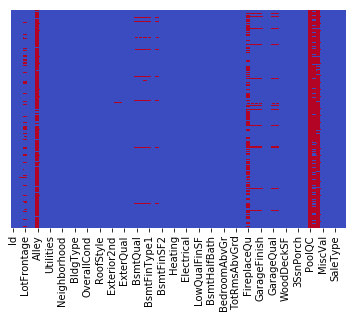

In [8]:
# Here we can see the missing values present in the DF in heatmap
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

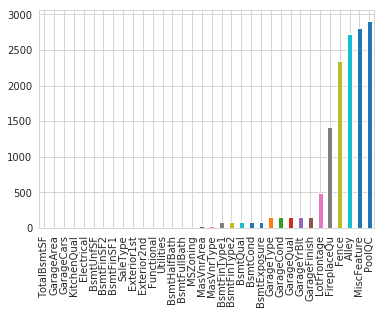

In [9]:
sns.set_style("whitegrid")
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [10]:
#step-1 get alll columns with Null values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]
print('total number of fatures are having null values {}'.format(len(features_with_na)))

# for feature in features_with_na:
#     print('Feature - {} and data type is {}'.format(feature ,df[feature].dtype))
# step-2 get the percentage of missing values in each column
for feature in features_with_na:
    print(feature ,np.round(dataset[feature].isnull().mean(),4),'% missing value')

total number of fatures are having null values 34
MSZoning 0.0014 % missing value
LotFrontage 0.1665 % missing value
Alley 0.9322 % missing value
Utilities 0.0007 % missing value
Exterior1st 0.0003 % missing value
Exterior2nd 0.0003 % missing value
MasVnrType 0.0082 % missing value
MasVnrArea 0.0079 % missing value
BsmtQual 0.0277 % missing value
BsmtCond 0.0281 % missing value
BsmtExposure 0.0281 % missing value
BsmtFinType1 0.0271 % missing value
BsmtFinSF1 0.0003 % missing value
BsmtFinType2 0.0274 % missing value
BsmtFinSF2 0.0003 % missing value
BsmtUnfSF 0.0003 % missing value
TotalBsmtSF 0.0003 % missing value
Electrical 0.0003 % missing value
BsmtFullBath 0.0007 % missing value
BsmtHalfBath 0.0007 % missing value
KitchenQual 0.0003 % missing value
Functional 0.0007 % missing value
FireplaceQu 0.4865 % missing value
GarageType 0.0538 % missing value
GarageYrBlt 0.0545 % missing value
GarageFinish 0.0545 % missing value
GarageCars 0.0003 % missing value
GarageArea 0.0003 % missin

In [11]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
# print(test_normality)
normal = pd.DataFrame(dataset[numerical_features])
normal = normal.apply(test_normality)
print(not normal.any())

NameError: name 'numerical_features' is not defined

### Since they are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagram for this relationship


In [ ]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With  the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [ ]:
print("Id of Houses {}".format(len(dataset.Id)))

In [ ]:
#Total number of features
dataset.info()

# 2. Numerical Variables

In [ ]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
print('Number of categorical variables: ', len(categorical_features))

numerical_features.remove('SalePrice')
numerical_features.remove('Id')
# # list of information that contains year value
# Year_features=[feature for feature in data.columns if 'Yr'in feature or 'Year' in feature]
# Year_features

#### Temporal Variables(Eg: Datetime Variables)

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering which is the next video.

In [ ]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

In [ ]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

In [ ]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



In [ ]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

    
    

#### Discrete Variable

In [ ]:
# in numerical varoiable we have two types - continious and discrete 
discrete_feature=[features for features in numerical_features if len(dataset[features].unique())<25 and features  not in year_feature+['id'] ]

print(len(discrete_feature))
discrete_feature

In [ ]:
dataset[discrete_feature].head()

In [ ]:
## Lets Find the realtionship between them and Sale PRice
for feature in discrete_feature:
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Continuous Variable

In [ ]:
continious_feature=[features for features in numerical_features if features not in discrete_feature+year_feature+['id']]
print(len(continious_feature))

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continious_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

In [ ]:
## We will be using logarithmic transformation


for feature in continious_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        
    

# 3.Outliers

In [ ]:
for feature in continious_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# 4.Categorical Features

In [ ]:
categorical_feature=[features for features in dataset.columns if dataset[features].dtype=='O']
categorical_feature
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

In [ ]:
# find the relationship between categorical features and dependent featute - Sales Price
for feature in categorical_feature:
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
dataset.info()

#                                                      Feature Engineering 

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

## Missing Values
#### First handle categorical features missing values

In [ ]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

In [ ]:
Categorical_feature=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtype=='O']
def HandleMissingCategoricalFeatuteValue(dataset,features):
    dataset[features]=dataset[features].fillna('missing')
    return data
HandleMissingCategoricalFeatuteValue(dataset,Categorical_feature)
dataset[Categorical_feature].isnull().values.any()

#### handle numerical features missing values

In [ ]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

In [ ]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()
    
dataset[numerical_with_nan].isnull().values.any()

In [ ]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [ ]:
dataset.head()

In [ ]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

## Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution

In [ ]:
dataset.head()

In [ ]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea',]

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [ ]:
# dataset.info()
len(dataset['SalePrice'])

In [ ]:
dataset.isnull().values.any()
null_feature=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]
null_feature
# dataset.isnull().sum()>1

## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [ ]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [ ]:
categorical_features

In [ ]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_dataset=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_dataset),dataset[feature],'Rare_var')

 

In [ ]:
dataset.head()

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head()

In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

## Feature Scaling

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

In [ ]:
scaler.transform(dataset[feature_scale])

In [ ]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()

In [ ]:
dataset.info()

In [ ]:
dataset.to_csv('X_train.csv',index=False)

# Feature Selection

In [ ]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
dataset=pd.read_csv('X_train.csv')

In [ ]:
dataset.head()

In [ ]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]

In [ ]:
## drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [ ]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

In [ ]:
feature_sel_model.get_support()

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

In [ ]:
selected_feat

In [ ]:
dataset=X_train[selected_feat]

In [ ]:
dataset['SalePrice']=y_train

In [ ]:
dataset.drop(['y_train'],axis=1,inplace=True)

In [ ]:
dataset.info()

In [ ]:
# df['BsmtCond'].value_counts()

In [ ]:
# df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [ ]:
# df['BsmtCond'].value_counts()

In [ ]:
# df['BsmtCond'].isnull().values.any()

**Selecting important features for further data clean up and model training . I have selected these feature based on the heat map. However feature selection is one area where I need to work more to get a good result **

In [ ]:
# import seaborn as sns
# #get correlations of each features in dataset
# corrmat = df.corr()
# top_corr_features = corrmat.index
# print(top_corr_features)
# # plt.figure(figsize=(30,30))
# # plot heat map
# # g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# df=df[["SalePrice","MSZoning","Neighborhood","BldgType","HouseStyle","Id","LotFrontage","LotArea","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","BsmtFullBath","GrLivArea","FullBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF"]]

**Checking if any null value present or not in the data set**

In [ ]:
# df.isnull().values.any()

**Get the data frame information**

In [ ]:
#  df.head()
# display(df)

**Clean up Data**

In [ ]:
# # Clean up MasVnrArea
# df.MasVnrArea.fillna(0,inplace=True)

# # Clean up LotFrontage
# df.LotFrontage.value_counts()
# df.LotFrontage.mean()
# df.LotFrontage.fillna(70.0,inplace=True)
# df.LotFrontage.isnull().values.any()

# # Clean up TotalBsmtSF
# df.TotalBsmtSF.mean()
# df.TotalBsmtSF.fillna(1051,inplace=True)
# df.TotalBsmtSF.isnull().values.any()

# # Clean up MSZoning
# df.MSZoning.value_counts()
# df.MSZoning.fillna(2265,inplace=True)

# # Clean up BsmtFinSF1
# df[df.BsmtFinSF1.isnull()]
# df.BsmtFinSF1.value_counts()
# df.BsmtFinSF1.fillna(0.0,inplace=True)

# # Clean up BsmtFullBath
# df[df.BsmtFullBath.isnull()]
# df.BsmtFullBath.value_counts()
# df.BsmtFullBath.fillna(0.0,inplace=True)

# # Clean up GarageCars
# df.GarageCars.value_counts()
# df.GarageCars.fillna(1594,inplace=True)
# df.GarageArea.value_counts()
# df.GarageArea.mean()
# df.GarageArea.fillna(480.0,inplace=True)

**Create columns for categorical features by using get_dummies method**

In [ ]:
# df=pd.get_dummies(df,columns=['MSZoning','Neighborhood','BldgType','HouseStyle'])

**Here data clean up is done , therefore we need to create train and test data frame for training machine learning model and test the same respectively**

In [ ]:
data_train=dataset.loc[dataset.SalePrice!=-888]
columns=[column for column in dataset.columns if column!='SalePrice']
data_test=dataset.loc[dataset.SalePrice==-888,columns]

**test data frame information**

**Train data frame information**

In [ ]:
print(data_train.isnull().values.any())
print(data_test.isnull().values.any())

**Separtae labels and feature from the data fram to train and test model**

In [ ]:
import numpy as np

labels=np.array(data_train['SalePrice'])
data_train=data_train.drop('SalePrice',axis=1)
features=np.array(data_train)

**Split train and test of the entire traing data set**

In [ ]:


train_feature,test_feature,train_label,test_label=train_test_split(features,labels,test_size=0.20,random_state=0)

print ('Training features shape : ' ,train_feature.shape)
print ('Testing feature shape : ' ,test_feature.shape)
print ('Training label shape : ' ,train_label.shape)
print ('Testing label shape : ' ,test_label.shape)

**Build a fucntion to get Root Mean Squared Logarithmic Error **

In [ ]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

## Training Random Forest model

In [ ]:
# Training random forest model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(train_feature,train_label)

# Predict Traing data
prediction_train=rf.predict(train_feature)
errors_train=abs(prediction_train-train_label)
print('Mean Absolute Error in Training data set for Ramdom Forest: ',round(np.mean(errors_train),2),'degrees.')
mape_train=100*(errors_train/train_label)
accuracy_train = 100-np.mean(mape_train)
print('Accuracy in training data set for random forest: ', round(accuracy_train,2),'%.')
rms_train = sqrt(mean_squared_error(train_label, prediction_train))
print ('Root mean square in training data set for random forest: ',rms_train)
rmsle_train=rmsle(train_label, prediction_train)

# Predict test data
prediction_test=rf.predict(test_feature)
errors_test=abs(prediction_test-test_label)
print('Mean Absolute Error in Test data set  for Ramdom Forest: ',round(np.mean(errors_test),2),'degrees.')
mape_test=100*(errors_test/test_label)
accuracy_test = 100-np.mean(mape_test)
print('Accuracy in test data set  for Ramdom Forest: ', round(accuracy_test,2),'%.')
rms_test = sqrt(mean_squared_error(test_label, prediction_test))
print ('Root mean square in test data set for random forest: ',rms_test)
rmsle_test=rmsle(test_label, prediction_test)
print ('Root mean square logarithmic error in test data set for random forest: ',rmsle_test)



In [ ]:
import pickle 
filename='finalized_model.pkl'
pickle.dump(rf,open(filename,'wb'))

## Training XGBoost Model

In [ ]:

XGB_resgression = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
XGB_resgression.fit(train_feature,train_label)

# # Predict Traing data
# prediction_train=XGB_resgression.predict(train_feature)
# errors_train=abs(prediction_train-train_label)
# print('Mean Absolute Error in Training data set for Ramdom Forest: ',round(np.mean(errors_train),2),'degrees.')
# mape_train=100*(errors_train/train_label)
# accuracy_train = 100-np.mean(mape_train)
# print('Accuracy in training data set for random forest: ', round(accuracy_train,2),'%.')
# rms_train = sqrt(mean_squared_error(train_label, prediction_train))
# print ('Root mean square in training data set for random forest: ',rms_train)
# rmsle_train=rmsle(train_label, prediction_train)

# # Predict test data
# prediction_test=XGB_resgression.predict(test_feature)
# errors_test=abs(prediction_test-test_label)
# print('Mean Absolute Error in Test data set  for Ramdom Forest: ',round(np.mean(errors_test),2),'degrees.')
# mape_test=100*(errors_test/test_label)
# accuracy_test = 100-np.mean(mape_test)
# print('Accuracy in test data set  for Ramdom Forest: ', round(accuracy_test,2),'%.')
# rms_test = sqrt(mean_squared_error(test_label, prediction_test))
# print ('Root mean square in test data set for random forest: ',rms_test)
# rmsle_test=rmsle(test_label, prediction_test)
# print ('Root mean square logarithmic error in test data set for random forest: ',rmsle_test)


In [ ]:
# import xgboost
# regressor=xgboost.XGBRegressor()

# booster=['gbtree','gblinear']
# base_score=[0.25,0.5,0.75,1]


# ## Hyper Parameter Optimization


# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# booster=['gbtree','gblinear']
# learning_rate=[0.05,0.1,0.15,0.20]
# min_child_weight=[1,2,3,4]

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
#     }



# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=regressor,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

## Training XGBoost Model after hyperparameters tunning

In [ ]:
# XGB_resgression=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
#        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)

# XGB_resgression.fit(train_feature,train_label)

# # Predict Traing data
# prediction_train=XGB_resgression.predict(train_feature)
# errors_train=abs(prediction_train-train_label)
# print('Mean Absolute Error in Training data set for Ramdom Forest: ',round(np.mean(errors_train),2),'degrees.')
# mape_train=100*(errors_train/train_label)
# accuracy_train = 100-np.mean(mape_train)
# print('Accuracy in training data set for random forest: ', round(accuracy_train,2),'%.')
# rms_train = sqrt(mean_squared_error(train_label, prediction_train))
# print ('Root mean square in training data set for random forest: ',rms_train)
# rmsle_train=rmsle(train_label, prediction_train)

# # Predict test data
# prediction_test=XGB_resgression.predict(test_feature)
# errors_test=abs(prediction_test-test_label)
# print('Mean Absolute Error in Test data set  for Ramdom Forest: ',round(np.mean(errors_test),2),'degrees.')
# mape_test=100*(errors_test/test_label)
# accuracy_test = 100-np.mean(mape_test)
# print('Accuracy in test data set  for Ramdom Forest: ', round(accuracy_test,2),'%.')
# rms_test = sqrt(mean_squared_error(test_label, prediction_test))
# print ('Root mean square in test data set for random forest: ',rms_test)
# rmsle_test=rmsle(test_label, prediction_test)
# print ('Root mean square logarithmic error in test data set for random forest: ',rmsle_test)


In [ ]:
import pickle 
filename='finalized_model.pkl'
pickle.dump(XGB_resgression,open(filename,'wb'))

## Predict the actual test data frame- Random Forest

In [ ]:
prediction=rf.predict(data_test)

In [ ]:
data_test.info()

## Predict the actual test data frame- XGBoost

In [ ]:
prediction_XGBoost=XGB_resgression.predict(data_test)

**Get the final csv file**

In [ ]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(prediction, columns=['SalePrice']).to_csv('final.csv')

In [ ]:
df_final=pd.read_csv('final.csv')